In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Customer-churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Removing unrelated Features

In [ ]:
df.drop(['SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines', 'OnlineBackup', 'DeviceProtection','StreamingTV', 'StreamingMovies'],axis = 1,inplace = True)

In [7]:
df.head()

,customerID,gender,tenure,InternetService,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,1,DSL,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,34,DSL,Yes,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,2,DSL,Yes,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,45,DSL,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,2,Fiber optic,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Changing the Total charges string format to numeric

In [240]:
df_churnYes['TotalCharges'] = pd.to_numeric(
    df_churnYes['TotalCharges'],
    errors='coerce'
)

C:\Users\Abdul Hakim\AppData\Local\Temp\ipykernel_22336\2926151609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churnYes['TotalCharges'] = pd.to_numeric(


In [9]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [11]:
def tenure_period(days):
    if days < 6:
        return "New"
    if days >= 6 and days <=24:
        return "Mid"
    if days > 24:
        return "Long"

df['tenure_periodstatus'] = df['tenure'].apply(tenure_period)

In [13]:
df.groupby(['Churn','tenure_periodstatus'])['Contract'].value_counts()

Churn  tenure_periodstatus  Contract      
No     Long                 Two year          1489
                            One year          1015
                            Month-to-month     791
       Mid                  Month-to-month     851
                            One year           264
                            Two year           137
       New                  Month-to-month     578
                            One year            28
                            Two year            21
Yes    Long                 Month-to-month     353
                            One year           137
                            Two year            48
       Mid                  Month-to-month     562
                            One year            25
       New                  Month-to-month     740
                            One year             4
Name: count, dtype: int64

In [14]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [18]:
df.head()

,customerID,gender,tenure,InternetService,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_periodstatus
0,7590-VHVEG,Female,1,DSL,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,New
1,5575-GNVDE,Male,34,DSL,Yes,No,One year,No,Mailed check,56.95,1889.5,No,Long
2,3668-QPYBK,Male,2,DSL,Yes,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,New
3,7795-CFOCW,Male,45,DSL,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,No,Long
4,9237-HQITU,Female,2,Fiber optic,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,New


In [247]:
df.groupby('Churn')['tenure_periodstatus'].value_counts()

Churn  tenure_periodstatus
No     Long                   3295
       Mid                    1252
       New                     627
Yes    New                     744
       Mid                     587
       Long                    538
Name: count, dtype: int64

<Axes: xlabel='tenure_periodstatus', ylabel='count'>

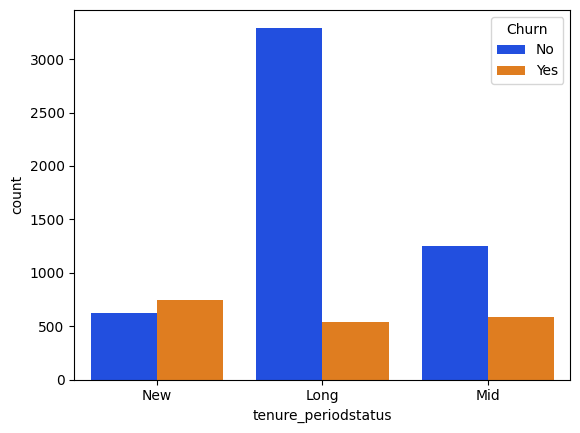

In [233]:
sns.countplot(data = df,hue='Churn',x ='tenure_periodstatus',palette = 'bright')

In [245]:
df.groupby('Contract')['Churn'].value_counts()

Contract        Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1307
                Yes       166
Two year        No       1647
                Yes        48
Name: count, dtype: int64

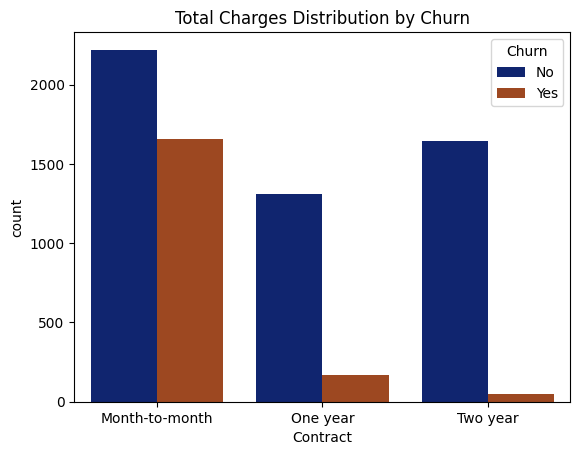

In [234]:
sns.countplot(data=df, x='Contract', hue='Churn',palette = 'dark')
plt.title("Total Charges Distribution by Churn")
plt.show()

In [244]:
df.groupby('Churn')['MonthlyCharges'].mean()

Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64

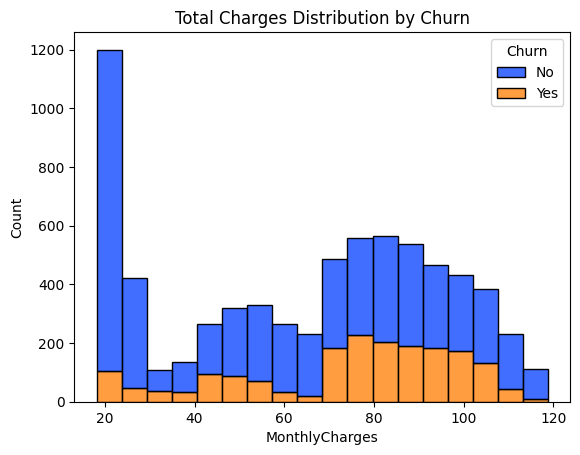

In [235]:
sns.histplot(data=df, x='MonthlyCharges', hue='Churn',multiple='stack',palette = 'bright')
plt.title("Total Charges Distribution by Churn")
plt.show()

In [241]:
df.groupby('PaymentMethod')['Churn'].value_counts()

PaymentMethod              Churn
Bank transfer (automatic)  No       1286
                           Yes       258
Credit card (automatic)    No       1290
                           Yes       232
Electronic check           No       1294
                           Yes      1071
Mailed check               No       1304
                           Yes       308
Name: count, dtype: int64

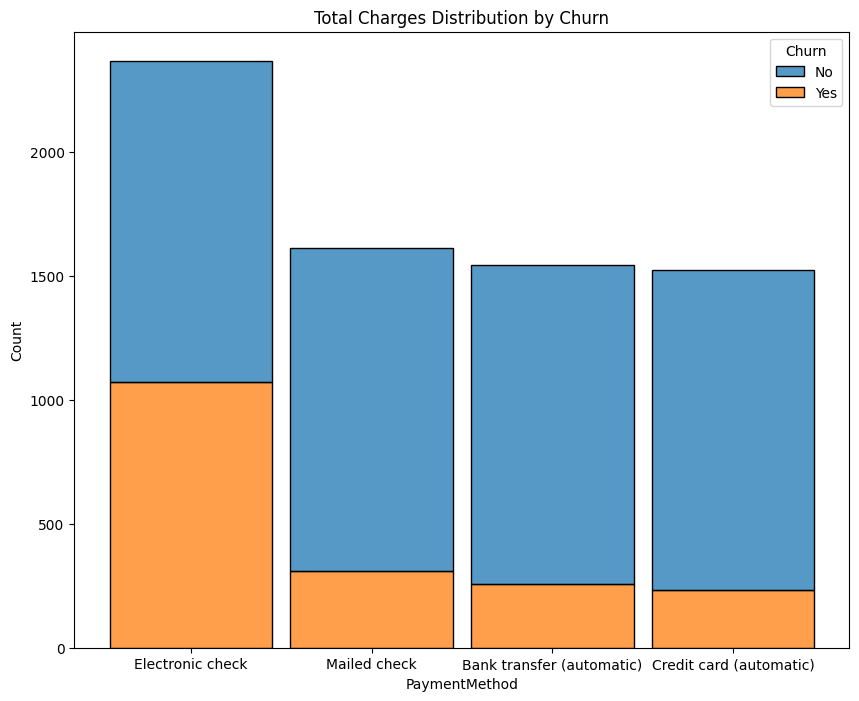

In [238]:
figure = plt.figure(figsize = (10,8))
sns.histplot(data=df, x='PaymentMethod', hue='Churn',multiple ='stack',shrink = 0.9)
plt.title("Total Charges Distribution by Churn")
plt.show()

In [251]:
df.groupby('Churn')['InternetService'].value_counts()

Churn  InternetService
No     DSL                1962
       Fiber optic        1799
       No                 1413
Yes    Fiber optic        1297
       DSL                 459
       No                  113
Name: count, dtype: int64

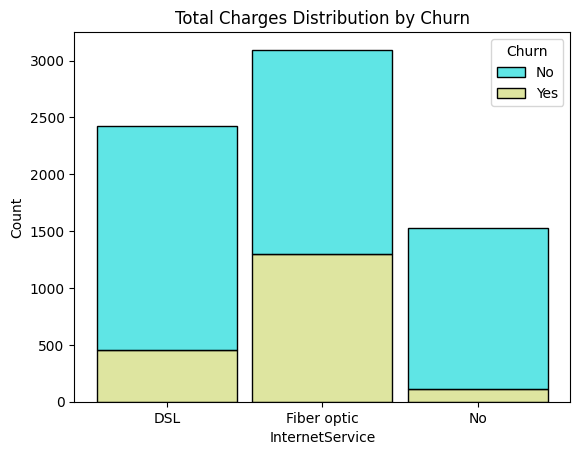

In [250]:
sns.histplot(data=df, x='InternetService', hue='Churn',multiple ='stack',shrink = 0.9,palette= 'rainbow')
plt.title("Total Charges Distribution by Churn")
plt.show()

In [20]:
df.head()

,customerID,gender,tenure,InternetService,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_periodstatus
0,7590-VHVEG,Female,1,DSL,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,New
1,5575-GNVDE,Male,34,DSL,Yes,No,One year,No,Mailed check,56.95,1889.5,No,Long
2,3668-QPYBK,Male,2,DSL,Yes,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,New
3,7795-CFOCW,Male,45,DSL,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,No,Long
4,9237-HQITU,Female,2,Fiber optic,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,New


In [21]:
df_churnYes = df[df['Churn']=='Yes']

In [22]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [24]:
df_churnYes['tenure_periodstatus'].value_counts()

tenure_periodstatus
New     744
Mid     587
Long    538
Name: count, dtype: int64

# New tenure analysis

In [25]:
df_churnYes[df_churnYes['tenure_periodstatus'] == 'New']['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             437
Mailed check                 202
Bank transfer (automatic)     56
Credit card (automatic)       49
Name: count, dtype: int64

In [26]:
df_churnYes[df_churnYes['tenure_periodstatus'] == 'New']['Contract'].value_counts()

Contract
Month-to-month    740
One year            4
Name: count, dtype: int64

In [27]:
df_churnYes[df_churnYes['tenure_periodstatus'] == 'New']['InternetService'].value_counts()

InternetService
Fiber optic    431
DSL            236
No              77
Name: count, dtype: int64

In [28]:
df_churnYes[df_churnYes['tenure_periodstatus'] == 'New']['PaperlessBilling'].value_counts()

PaperlessBilling
Yes    516
No     228
Name: count, dtype: int64

Majority of customer having { Payment M => Electronic check: 437 ,contract => Month-to-month : 740 ,
InternetService => Fiber optic : 431 ,PaperlessBilling => 516}

In [29]:
df_churnYes[(df_churnYes['tenure_periodstatus'] == 'New') &(df_churnYes['PaymentMethod'] == 'Electronic check') & (df_churnYes['Contract'] == 'Month-to-month') & (df_churnYes['InternetService'] == 'Fiber optic') & (df_churnYes['PaperlessBilling'] == 'Yes')]

,customerID,gender,tenure,InternetService,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_periodstatus
4,9237-HQITU,Female,2,Fiber optic,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,New
36,6047-YHPVI,Male,5,Fiber optic,No,No,Month-to-month,Yes,Electronic check,69.70,316.9,Yes,New
47,7760-OYPDY,Female,2,Fiber optic,No,No,Month-to-month,Yes,Electronic check,80.65,144.15,Yes,New
80,5919-TMRGD,Female,1,Fiber optic,No,No,Month-to-month,Yes,Electronic check,79.35,79.35,Yes,New
122,0404-SWRVG,Male,3,Fiber optic,No,No,Month-to-month,Yes,Electronic check,74.40,229.55,Yes,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6933,6502-MJQAE,Male,1,Fiber optic,No,No,Month-to-month,Yes,Electronic check,69.60,69.6,Yes,New
6936,7693-LCKZL,Male,5,Fiber optic,No,No,Month-to-month,Yes,Electronic check,80.15,385,Yes,New
6970,8083-YTZES,Male,4,Fiber optic,No,No,Month-to-month,Yes,Electronic check,74.35,265.35,Yes,New
7010,0723-DRCLG,Female,1,Fiber optic,No,No,Month-to-month,Yes,Electronic check,74.45,74.45,Yes,New


Major problems of  256 New customers were churned because of Fiber optic (Internet Service) ,Electronic check (Payment Method) , Month-to-Month (Contract) and paperless billing 

# Mid Customer analysis

In [30]:
df_churnYes[df_churnYes['tenure_periodstatus'] == 'Mid']['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             353
Bank transfer (automatic)     86
Credit card (automatic)       74
Mailed check                  74
Name: count, dtype: int64

In [31]:
df_churnYes[df_churnYes['tenure_periodstatus'] == 'Mid']['Contract'].value_counts()

Contract
Month-to-month    562
One year           25
Name: count, dtype: int64

In [32]:
df_churnYes[df_churnYes['tenure_periodstatus'] == 'Mid']['InternetService'].value_counts()

InternetService
Fiber optic    433
DSL            130
No              24
Name: count, dtype: int64

In [33]:
df_churnYes[df_churnYes['tenure_periodstatus'] == 'Mid']['PaperlessBilling'].value_counts()

PaperlessBilling
Yes    460
No     127
Name: count, dtype: int64

In [34]:
df_churnYes[(df_churnYes['tenure_periodstatus'] == 'Mid') &(df_churnYes['PaymentMethod'] == 'Electronic check') & (df_churnYes['Contract'] == 'Month-to-month') & (df_churnYes['InternetService'] == 'Fiber optic') & (df_churnYes['PaperlessBilling'] == 'Yes')]

,customerID,gender,tenure,InternetService,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_periodstatus
5,9305-CDSKC,Female,8,Fiber optic,No,No,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,Mid
55,1658-BYGOY,Male,18,Fiber optic,No,No,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes,Mid
95,8637-XJIVR,Female,12,Fiber optic,Yes,No,Month-to-month,Yes,Electronic check,78.95,927.35,Yes,Mid
117,5299-RULOA,Female,10,Fiber optic,Yes,No,Month-to-month,Yes,Electronic check,100.25,1064.65,Yes,Mid
184,1918-ZBFQJ,Female,13,Fiber optic,No,No,Month-to-month,Yes,Electronic check,79.25,1111.65,Yes,Mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6861,6692-UDPJC,Female,14,Fiber optic,No,Yes,Month-to-month,Yes,Electronic check,91.65,1301,Yes,Mid
6868,1195-OIYEJ,Male,13,Fiber optic,No,No,Month-to-month,Yes,Electronic check,91.10,1135.7,Yes,Mid
6878,2990-HWIML,Female,6,Fiber optic,No,No,Month-to-month,Yes,Electronic check,89.50,573.3,Yes,Mid
6953,1564-NTYXF,Female,13,Fiber optic,No,No,Month-to-month,Yes,Electronic check,82.00,1127.2,Yes,Mid


Major problems of  245 Mid customers were churned because of Fiber optic (Internet Service) ,Electronic check (Payment Method) , Month-to-Month (Contract) and paperless billing 

# Long Customer analysis

In [35]:
df_churnYes[df_churnYes['tenure_periodstatus'] == 'Long']['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             281
Bank transfer (automatic)    116
Credit card (automatic)      109
Mailed check                  32
Name: count, dtype: int64

In [36]:
df_churnYes[df_churnYes['tenure_periodstatus'] == 'Long']['Contract'].value_counts()

Contract
Month-to-month    353
One year          137
Two year           48
Name: count, dtype: int64

In [37]:
df_churnYes[df_churnYes['tenure_periodstatus'] == 'Long']['InternetService'].value_counts()

InternetService
Fiber optic    433
DSL             93
No              12
Name: count, dtype: int64

In [38]:
df_churnYes[df_churnYes['tenure_periodstatus'] == 'Long']['PaperlessBilling'].value_counts()

PaperlessBilling
Yes    424
No     114
Name: count, dtype: int64

In [39]:
df_churnYes[(df_churnYes['tenure_periodstatus'] == 'Long') &(df_churnYes['PaymentMethod'] == 'Electronic check') & (df_churnYes['Contract'] == 'Month-to-month') & (df_churnYes['InternetService'] == 'Fiber optic') & (df_churnYes['PaperlessBilling'] == 'Yes')]

,customerID,gender,tenure,InternetService,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_periodstatus
8,7892-POOKP,Female,28,Fiber optic,No,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Long
26,6467-CHFZW,Male,47,Fiber optic,No,No,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,Long
38,5380-WJKOV,Male,34,Fiber optic,No,No,Month-to-month,Yes,Electronic check,106.35,3549.25,Yes,Long
99,4598-XLKNJ,Female,25,Fiber optic,No,No,Month-to-month,Yes,Electronic check,98.50,2514.5,Yes,Long
110,0486-HECZI,Male,55,Fiber optic,Yes,No,Month-to-month,Yes,Electronic check,96.75,5238.9,Yes,Long
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6914,7142-HVGBG,Male,43,Fiber optic,No,No,Month-to-month,Yes,Electronic check,103.00,4414.3,Yes,Long
6926,1450-SKCVI,Female,56,Fiber optic,No,No,Month-to-month,Yes,Electronic check,73.85,4092.85,Yes,Long
6962,0886-QGENL,Female,27,Fiber optic,Yes,No,Month-to-month,Yes,Electronic check,101.25,2754.45,Yes,Long
6967,8739-WWKDU,Male,25,Fiber optic,No,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes,Long


# Monthly Charges Analysis 

Contract : Month to Month

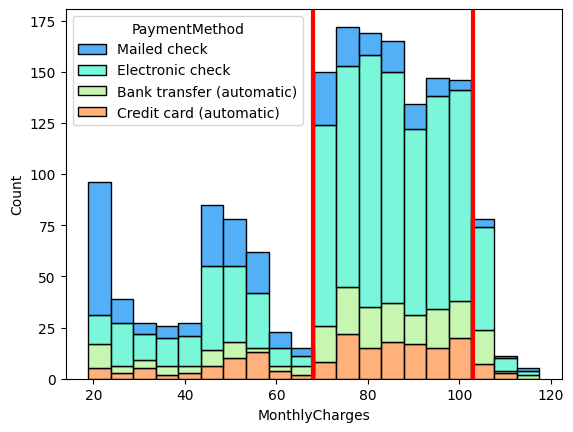

In [91]:
sns.histplot(data= df_churnYes[df_churnYes['Contract']=='Month-to-month'] ,x ='MonthlyCharges',palette='rainbow',bins=20,hue='PaymentMethod',multiple='stack')
plt.axvline(x=68,color ='red',linewidth = 3,label= 'x = 68 to 103')
plt.axvline(x=103,color ='red',linewidth = 3)

# Total Charges Analysis

Contract : One Year and Two year

<Axes: xlabel='TotalCharges', ylabel='Count'>

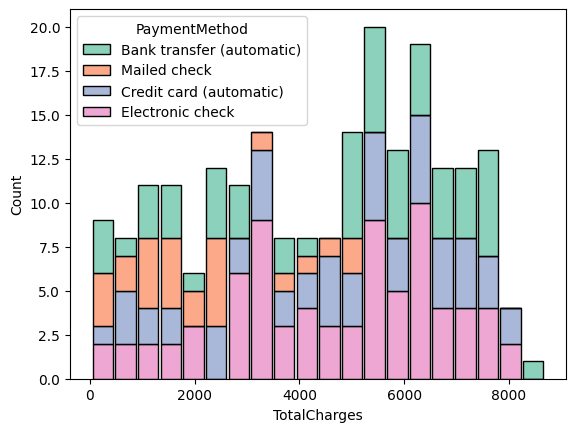

In [175]:
sns.histplot(data= df_churnYes[(df_churnYes['Contract'] == 'One year') | (df_churnYes['Contract'] == 'Two year')], x ='TotalCharges',bins =20,palette ='Set2',hue='PaymentMethod',shrink=0.9,multiple='stack')

<Axes: xlabel='TotalCharges', ylabel='tenure_periodstatus'>

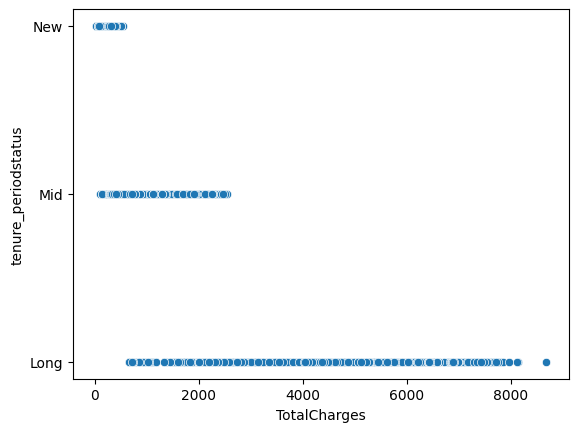

In [176]:
sns.scatterplot(data= df_churnYes , x= 'TotalCharges',y = 'tenure_periodstatus')

In [ ]:
MidTenure_Twoyear_TotalChargeavg = df_churnYes[(df_churnYes['Contract'] =='Two year') & (df_churnYes['tenure_periodstatus'] =='Mid')]['TotalCharges'].mean()

In [203]:
NewTenure_Oneyear_TotalChargeavg = df_churnYes[(df_churnYes['Contract'] =='One year') & (df_churnYes['tenure_periodstatus'] =='New')]['TotalCharges'].mean()

In [204]:
MidTenure_Oneyear_TotalChargeavg =df_churnYes[(df_churnYes['Contract'] =='One year') & (df_churnYes['tenure_periodstatus'] =='Mid')]['TotalCharges'].mean()

In [205]:
LongTenure_Oneyear_TotalChargeavg = df_churnYes[(df_churnYes['Contract'] =='One year') & (df_churnYes['tenure_periodstatus'] =='Long')]['TotalCharges'].mean()

In [206]:
NewTenure_Twoyear_TotalChargeavg = df_churnYes[(df_churnYes['Contract'] =='Two year') & (df_churnYes['tenure_periodstatus'] =='New')]['TotalCharges'].mean()

In [207]:
LongTenure_Twoyear_TotalChargeavg = df_churnYes[(df_churnYes['Contract'] =='Two year') & (df_churnYes['tenure_periodstatus'] =='Long')]['TotalCharges'].mean()

In [222]:
Average_TotalCharges_Churned = pd.DataFrame(
    {'One year' : [NewTenure_Oneyear_TotalChargeavg,MidTenure_Oneyear_TotalChargeavg,
                                                                  LongTenure_Oneyear_TotalChargeavg],
                                                     'Two year' : [NewTenure_Twoyear_TotalChargeavg,MidTenure_Twoyear_TotalChargeavg,
                                                                   LongTenure_Twoyear_TotalChargeavg]  
                                          },index = ['New','Mid','Long']
            )



In [223]:
Average_TotalCharges_Churned.fillna(0)

,One year,Two year
New,213.875000,0.000000
Mid,1011.648000,0.000000
Long,4736.091241,5432.363542
